In [1]:
import numpy as np
import gym
import my_tictactoe ## Custom Tic-Tac-Toe environment. See ReadME for instructions on installing

In [2]:
def transform(state):  ### Function to transform the 2D state matrix to a 1D list
    out = []
    for i in range(0,3):
        for j in range(0,3):
            out.append(state[i][j])
    return out

In [3]:
def map_state(state): ### Function to give a mapping of the states with an integer
    total = 0
    for i in range(0,9):
        if(state[i]=='_'):
            total+=(3**i)*0
        elif(state[i]=='x'):
            total+=(3**i)*1
        elif(state[i]=='o'):
            total+=(3**i)*2
    return total

In [4]:
def action_set(state):  ### Function to return available actions
    act = []
    for i in range(0,9):
        if(state[i]=='_'):
            act.append(i)
    return act

In [5]:
env = gym.make('my_tictactoe-v0')

In [6]:
def epsilon_greedy(Q,s,a_set=[0,1,2,3,4,5,6,7,8]): ### Function to select an action epsilon greedily. Epsilon = 0.1
    pr = np.random.choice([0,1], p = [0.1,0.9])
    if(pr == 0):
        a = np.random.choice(a_set)
    else:
        temp = np.max(Q[s,a_set])
        for i in range(0,9):
            if Q[s,i] == temp:
                a = i
                break;
    return a

In [7]:
def greedy(Q,s,a_set=[1,2,3,4,5,6,7,8]): ### Function to select an action greedily.
    pr = np.random.choice([0,1], p = [0,1])
    if(pr == 0):
        a = np.random.choice(a_set)
    else:
        temp = np.max(Q[s,a_set])
        for i in range(0,9):
            if Q[s,i] == temp:
                a = i
                break;
    return a

In [8]:
def safe_choice(state,a_set):  ### Safe choice opponent
    for i in range(0,3):
        if(state[i][0]==state[i][1] and state[i][2] == '_' and state[i][0]=='x'):
            return (i*3+2)
        if(state[i][1]==state[i][2] and state[i][0] == '_' and state[i][1]=='x'):
            return (i*3+0)
        if(state[i][2]==state[i][0] and state[i][1] == '_' and state[i][2]=='x'):
            return (i*3+1)
        
        
        if(state[0][i]==state[1][i] and state[i][2] == '_' and state[0][i]=='x'):
            return (2*3+i)
        if(state[1][i]==state[2][i] and state[i][0] == '_' and state[1][i]=='x'):
            return (0*3+i)
        if(state[2][i]==state[0][i] and state[i][1] == '_' and state[2][i]=='x'):
            return (1*3+i)
        
        
    if(state[0][0]==state[1][1] and state[2][2] == '_' and state[0][0]=='x'):
        return (8)
    if(state[1][1]==state[2][2] and state[0][0] == '_' and state[1][1]=='x'):
        return (0)
    if(state[2][2]==state[0][0] and state[1][1] == '_' and state[2][2]=='x'):
        return (4)

    if(state[0][2]==state[1][1] and state[2][0] == '_' and state[0][2]=='x'):
        return (6)
    if(state[1][1]==state[2][0] and state[0][2] == '_' and state[1][1]=='x'):
        return (2)
    if(state[2][0]==state[0][2] and state[1][1] == '_' and state[2][0]=='x'):
        return (4)
    return np.random.choice(a_set)

In [9]:
gama = 0.5
alpha = 0.7
noe = 10000 ### Number of epochs

In [10]:
env.reset()
env.reset_tally()

In [11]:
###############
###TRAINING ###
###############

In [12]:
Q = np.random.rand(3**9,9)  ## Q table
env.reset_tally()
ef_test = np.empty([50,2])
k = 0
for i in range(0,noe):
    print("Episode =", i)
    env.reset()
    s = 0
    a = epsilon_greedy(Q,s)
    state, reward, is_over, tally = env.act(a)
    state_tr = transform(state)
    a_set = action_set(state_tr)
    while(is_over!=1):
        r_tot = 0
        
        state, reward, is_over, tally = env.act(np.random.choice(a_set)) ## Training against random agent
        
        ## Uncomment the following two lines to see the steps of the opponent
#         env.print()
#         print(" ")

        state_tr = transform(state)
        a_set = action_set(state_tr)
        r_tot+=reward
        
        s = map_state(state_tr)
        if(len(a_set) == 0):
            break;
        a = epsilon_greedy(Q,s,a_set)

        
        state, reward, is_over, tally = env.act(a)
        state_tr = transform(state)
        sn = map_state(state_tr)
        a_set = action_set(state_tr)
        r_tot+=reward
        
        if(len(a_set) == 0):
            mx = 0
        else:
            mx = np.max(Q[sn,a_set])
        Q[s,a] = Q[s,a] + alpha*(r_tot + gama*mx - Q[s,a])
        
        ## Uncomment the following two lines to see the steps of the agent
#         env.print()
#         print(" ")

    ## Uncomment the following two lines to see the result tally after each epoch 
#     tl = env.print_tally()
#     print("Our agent won ",tl[0]," matches, opponent won ",tl[1]," matches.")

    print(" ")
    
    ## Checking efficacy as asked in the question
    if(i%200==0):
        ntest = 100
        env.reset()
        env.reset_tally()
        s = 0
        for j in range(0,ntest):
            print("Checking Efficacy, Episode", j)
            env.reset()
            s = 0
            a = greedy(Q,s)
            state, reward, is_over, tally = env.act(a)
            state_tr = transform(state)
            a_set = action_set(state_tr)

            while(is_over!=1):
                state, reward, is_over, tally = env.act(np.random.choice(a_set))
                state_tr = transform(state)
                a_set = action_set(state_tr)
                s = map_state(state_tr)

                if(len(a_set) == 0):
                    break;

                a = greedy(Q,s,a_set)
                state, reward, is_over, tally = env.act(a)
                state_tr = transform(state)
                sn = map_state(state_tr)
                a_set = action_set(state_tr)
            temp = env.print_tally()
        ef_test[k,0] = temp[0]
        ef_test[k,1] = temp[1]
#         print("Our agent won ",ef_test[k,0]," matches, opponent won ",ef_test[k,1]," matches.")
        k+=1

Episode = 0
Player  1  wins the round
 
Checking Efficacy, Episode 0
Player  2  wins the round
Game Over
Checking Efficacy, Episode 1
Player  2  wins the round
Game Over
Checking Efficacy, Episode 2
Player  2  wins the round
Game Over
Checking Efficacy, Episode 3
Player  1  wins the round
Checking Efficacy, Episode 4
Player  2  wins the round
Game Over
Checking Efficacy, Episode 5
Player  2  wins the round
Game Over
Checking Efficacy, Episode 6
Player  1  wins the round
Checking Efficacy, Episode 7
Player  2  wins the round
Game Over
Checking Efficacy, Episode 8
Player  1  wins the round
Checking Efficacy, Episode 9
Player  1  wins the round
Checking Efficacy, Episode 10
Player  1  wins the round
Checking Efficacy, Episode 11
Player  1  wins the round
Checking Efficacy, Episode 12
Player  1  wins the round
Checking Efficacy, Episode 13
Player  2  wins the round
Game Over
Checking Efficacy, Episode 14
Player  2  wins the round
Game Over
Checking Efficacy, Episode 15
Player  1  wins the 

Player  2  wins the round
Game Over
 
Episode = 84
Player  1  wins the round
 
Episode = 85
Player  2  wins the round
Game Over
 
Episode = 86
Player  1  wins the round
 
Episode = 87
Player  2  wins the round
Game Over
 
Episode = 88
Player  1  wins the round
 
Episode = 89
Player  1  wins the round
 
Episode = 90
Player  2  wins the round
Game Over
 
Episode = 91
 
Episode = 92
Player  1  wins the round
 
Episode = 93
Player  1  wins the round
 
Episode = 94
Player  1  wins the round
 
Episode = 95
 
Episode = 96
 
Episode = 97
Player  2  wins the round
Game Over
 
Episode = 98
Player  1  wins the round
 
Episode = 99
Player  2  wins the round
Game Over
 
Episode = 100
Player  1  wins the round
 
Episode = 101
Player  2  wins the round
Game Over
 
Episode = 102
Player  2  wins the round
Game Over
 
Episode = 103
Player  1  wins the round
 
Episode = 104
Player  1  wins the round
 
Episode = 105
Player  2  wins the round
Game Over
 
Episode = 106
 
Episode = 107
Player  1  wins the ro

Player  2  wins the round
Game Over
Checking Efficacy, Episode 76
Player  1  wins the round
Checking Efficacy, Episode 77
Checking Efficacy, Episode 78
Player  1  wins the round
Checking Efficacy, Episode 79
Player  1  wins the round
Checking Efficacy, Episode 80
Checking Efficacy, Episode 81
Player  1  wins the round
Checking Efficacy, Episode 82
Player  1  wins the round
Checking Efficacy, Episode 83
Player  1  wins the round
Checking Efficacy, Episode 84
Player  1  wins the round
Checking Efficacy, Episode 85
Player  1  wins the round
Checking Efficacy, Episode 86
Checking Efficacy, Episode 87
Checking Efficacy, Episode 88
Player  1  wins the round
Checking Efficacy, Episode 89
Player  2  wins the round
Game Over
Checking Efficacy, Episode 90
Player  1  wins the round
Checking Efficacy, Episode 91
Player  1  wins the round
Checking Efficacy, Episode 92
Player  2  wins the round
Game Over
Checking Efficacy, Episode 93
Player  1  wins the round
Checking Efficacy, Episode 94
Player  1 

Player  1  wins the round
Checking Efficacy, Episode 8
Player  1  wins the round
Checking Efficacy, Episode 9
Player  1  wins the round
Checking Efficacy, Episode 10
Player  1  wins the round
Checking Efficacy, Episode 11
Player  2  wins the round
Game Over
Checking Efficacy, Episode 12
Player  1  wins the round
Checking Efficacy, Episode 13
Player  1  wins the round
Checking Efficacy, Episode 14
Player  1  wins the round
Checking Efficacy, Episode 15
Player  1  wins the round
Checking Efficacy, Episode 16
Player  1  wins the round
Checking Efficacy, Episode 17
Player  1  wins the round
Checking Efficacy, Episode 18
Checking Efficacy, Episode 19
Player  2  wins the round
Game Over
Checking Efficacy, Episode 20
Player  1  wins the round
Checking Efficacy, Episode 21
Player  1  wins the round
Checking Efficacy, Episode 22
Player  1  wins the round
Checking Efficacy, Episode 23
Player  2  wins the round
Game Over
Checking Efficacy, Episode 24
Player  1  wins the round
Checking Efficacy, E

Player  2  wins the round
Game Over
 
Episode = 494
Player  2  wins the round
Game Over
 
Episode = 495
Player  1  wins the round
 
Episode = 496
 
Episode = 497
Player  1  wins the round
 
Episode = 498
Player  1  wins the round
 
Episode = 499
Player  2  wins the round
Game Over
 
Episode = 500
Player  2  wins the round
Game Over
 
Episode = 501
Player  1  wins the round
 
Episode = 502
 
Episode = 503
Player  2  wins the round
Game Over
 
Episode = 504
Player  1  wins the round
 
Episode = 505
Player  1  wins the round
 
Episode = 506
Player  1  wins the round
 
Episode = 507
Player  2  wins the round
Game Over
 
Episode = 508
Player  1  wins the round
 
Episode = 509
 
Episode = 510
Player  2  wins the round
Game Over
 
Episode = 511
Player  1  wins the round
 
Episode = 512
 
Episode = 513
Player  1  wins the round
 
Episode = 514
Player  1  wins the round
 
Episode = 515
Player  1  wins the round
 
Episode = 516
Player  1  wins the round
 
Episode = 517
Player  1  wins the round


 
Episode = 687
Player  1  wins the round
 
Episode = 688
Player  2  wins the round
Game Over
 
Episode = 689
Player  1  wins the round
 
Episode = 690
Player  1  wins the round
 
Episode = 691
 
Episode = 692
Player  1  wins the round
 
Episode = 693
Player  1  wins the round
 
Episode = 694
Player  1  wins the round
 
Episode = 695
Player  1  wins the round
 
Episode = 696
Player  2  wins the round
Game Over
 
Episode = 697
Player  2  wins the round
Game Over
 
Episode = 698
Player  2  wins the round
Game Over
 
Episode = 699
Player  1  wins the round
 
Episode = 700
 
Episode = 701
Player  1  wins the round
 
Episode = 702
Player  1  wins the round
 
Episode = 703
Player  1  wins the round
 
Episode = 704
Player  1  wins the round
 
Episode = 705
Player  2  wins the round
Game Over
 
Episode = 706
Player  1  wins the round
 
Episode = 707
Player  2  wins the round
Game Over
 
Episode = 708
Player  1  wins the round
 
Episode = 709
Player  2  wins the round
Game Over
 
Episode = 710


Player  1  wins the round
Checking Efficacy, Episode 91
Checking Efficacy, Episode 92
Player  1  wins the round
Checking Efficacy, Episode 93
Player  1  wins the round
Checking Efficacy, Episode 94
Player  2  wins the round
Game Over
Checking Efficacy, Episode 95
Checking Efficacy, Episode 96
Player  1  wins the round
Checking Efficacy, Episode 97
Player  1  wins the round
Checking Efficacy, Episode 98
Player  2  wins the round
Game Over
Checking Efficacy, Episode 99
Player  2  wins the round
Game Over
Episode = 801
Player  1  wins the round
 
Episode = 802
Player  2  wins the round
Game Over
 
Episode = 803
Player  2  wins the round
Game Over
 
Episode = 804
Player  1  wins the round
 
Episode = 805
Player  1  wins the round
 
Episode = 806
Player  1  wins the round
 
Episode = 807
Player  1  wins the round
 
Episode = 808
Player  2  wins the round
Game Over
 
Episode = 809
Player  1  wins the round
 
Episode = 810
Player  1  wins the round
 
Episode = 811
Player  1  wins the round
 


Checking Efficacy, Episode 1
Player  1  wins the round
Checking Efficacy, Episode 2
Player  2  wins the round
Game Over
Checking Efficacy, Episode 3
Player  1  wins the round
Checking Efficacy, Episode 4
Player  1  wins the round
Checking Efficacy, Episode 5
Player  1  wins the round
Checking Efficacy, Episode 6
Player  1  wins the round
Checking Efficacy, Episode 7
Player  1  wins the round
Checking Efficacy, Episode 8
Player  1  wins the round
Checking Efficacy, Episode 9
Player  1  wins the round
Checking Efficacy, Episode 10
Player  1  wins the round
Checking Efficacy, Episode 11
Player  1  wins the round
Checking Efficacy, Episode 12
Player  2  wins the round
Game Over
Checking Efficacy, Episode 13
Player  2  wins the round
Game Over
Checking Efficacy, Episode 14
Player  2  wins the round
Game Over
Checking Efficacy, Episode 15
Player  1  wins the round
Checking Efficacy, Episode 16
Player  1  wins the round
Checking Efficacy, Episode 17
Player  1  wins the round
Checking Efficacy

Player  2  wins the round
Game Over
 
Episode = 1123
Player  1  wins the round
 
Episode = 1124
Player  2  wins the round
Game Over
 
Episode = 1125
Player  1  wins the round
 
Episode = 1126
Player  1  wins the round
 
Episode = 1127
Player  1  wins the round
 
Episode = 1128
Player  1  wins the round
 
Episode = 1129
 
Episode = 1130
Player  1  wins the round
 
Episode = 1131
Player  1  wins the round
 
Episode = 1132
Player  2  wins the round
Game Over
 
Episode = 1133
Player  1  wins the round
 
Episode = 1134
Player  1  wins the round
 
Episode = 1135
Player  1  wins the round
 
Episode = 1136
 
Episode = 1137
Player  1  wins the round
 
Episode = 1138
Player  1  wins the round
 
Episode = 1139
Player  1  wins the round
 
Episode = 1140
Player  1  wins the round
 
Episode = 1141
Player  1  wins the round
 
Episode = 1142
Player  1  wins the round
 
Episode = 1143
Player  1  wins the round
 
Episode = 1144
Player  1  wins the round
 
Episode = 1145
 
Episode = 1146
Player  1  wins 

Player  1  wins the round
 
Episode = 1233
Player  1  wins the round
 
Episode = 1234
 
Episode = 1235
Player  1  wins the round
 
Episode = 1236
Player  2  wins the round
Game Over
 
Episode = 1237
Player  1  wins the round
 
Episode = 1238
Player  1  wins the round
 
Episode = 1239
Player  1  wins the round
 
Episode = 1240
Player  1  wins the round
 
Episode = 1241
Player  1  wins the round
 
Episode = 1242
Player  2  wins the round
Game Over
 
Episode = 1243
 
Episode = 1244
Player  1  wins the round
 
Episode = 1245
Player  2  wins the round
Game Over
 
Episode = 1246
Player  2  wins the round
Game Over
 
Episode = 1247
 
Episode = 1248
 
Episode = 1249
Player  1  wins the round
 
Episode = 1250
Player  1  wins the round
 
Episode = 1251
Player  1  wins the round
 
Episode = 1252
Player  1  wins the round
 
Episode = 1253
Player  2  wins the round
Game Over
 
Episode = 1254
Player  2  wins the round
Game Over
 
Episode = 1255
Player  1  wins the round
 
Episode = 1256
Player  1  w

 
Episode = 1403
Player  1  wins the round
 
Episode = 1404
Player  1  wins the round
 
Episode = 1405
Player  1  wins the round
 
Episode = 1406
Player  1  wins the round
 
Episode = 1407
Player  1  wins the round
 
Episode = 1408
 
Episode = 1409
Player  1  wins the round
 
Episode = 1410
Player  1  wins the round
 
Episode = 1411
Player  1  wins the round
 
Episode = 1412
Player  1  wins the round
 
Episode = 1413
Player  1  wins the round
 
Episode = 1414
Player  2  wins the round
Game Over
 
Episode = 1415
Player  1  wins the round
 
Episode = 1416
 
Episode = 1417
Player  1  wins the round
 
Episode = 1418
Player  1  wins the round
 
Episode = 1419
Player  1  wins the round
 
Episode = 1420
 
Episode = 1421
 
Episode = 1422
Player  1  wins the round
 
Episode = 1423
Player  1  wins the round
 
Episode = 1424
Player  1  wins the round
 
Episode = 1425
 
Episode = 1426
Player  1  wins the round
 
Episode = 1427
Player  1  wins the round
 
Episode = 1428
Player  1  wins the round
 


Player  2  wins the round
Game Over
 
Episode = 1618
Player  2  wins the round
Game Over
 
Episode = 1619
Player  1  wins the round
 
Episode = 1620
Player  1  wins the round
 
Episode = 1621
Player  1  wins the round
 
Episode = 1622
Player  1  wins the round
 
Episode = 1623
Player  2  wins the round
Game Over
 
Episode = 1624
Player  1  wins the round
 
Episode = 1625
Player  1  wins the round
 
Episode = 1626
Player  1  wins the round
 
Episode = 1627
Player  1  wins the round
 
Episode = 1628
Player  1  wins the round
 
Episode = 1629
Player  2  wins the round
Game Over
 
Episode = 1630
Player  2  wins the round
Game Over
 
Episode = 1631
Player  1  wins the round
 
Episode = 1632
Player  1  wins the round
 
Episode = 1633
 
Episode = 1634
Player  2  wins the round
Game Over
 
Episode = 1635
Player  1  wins the round
 
Episode = 1636
Player  1  wins the round
 
Episode = 1637
Player  1  wins the round
 
Episode = 1638
Player  1  wins the round
 
Episode = 1639
Player  1  wins the 

Episode = 1897
Player  1  wins the round
 
Episode = 1898
Player  1  wins the round
 
Episode = 1899
Player  2  wins the round
Game Over
 
Episode = 1900
Player  1  wins the round
 
Episode = 1901
Player  1  wins the round
 
Episode = 1902
Player  2  wins the round
Game Over
 
Episode = 1903
Player  1  wins the round
 
Episode = 1904
Player  1  wins the round
 
Episode = 1905
Player  1  wins the round
 
Episode = 1906
Player  1  wins the round
 
Episode = 1907
Player  1  wins the round
 
Episode = 1908
Player  1  wins the round
 
Episode = 1909
Player  1  wins the round
 
Episode = 1910
 
Episode = 1911
Player  1  wins the round
 
Episode = 1912
Player  1  wins the round
 
Episode = 1913
Player  1  wins the round
 
Episode = 1914
Player  1  wins the round
 
Episode = 1915
 
Episode = 1916
Player  1  wins the round
 
Episode = 1917
Player  1  wins the round
 
Episode = 1918
Player  1  wins the round
 
Episode = 1919
Player  1  wins the round
 
Episode = 1920
Player  1  wins the round
 


 
Episode = 2026
 
Episode = 2027
Player  1  wins the round
 
Episode = 2028
Player  2  wins the round
Game Over
 
Episode = 2029
Player  1  wins the round
 
Episode = 2030
Player  1  wins the round
 
Episode = 2031
Player  1  wins the round
 
Episode = 2032
Player  1  wins the round
 
Episode = 2033
Player  1  wins the round
 
Episode = 2034
Player  1  wins the round
 
Episode = 2035
Player  1  wins the round
 
Episode = 2036
Player  1  wins the round
 
Episode = 2037
Player  1  wins the round
 
Episode = 2038
Player  1  wins the round
 
Episode = 2039
Player  1  wins the round
 
Episode = 2040
 
Episode = 2041
Player  1  wins the round
 
Episode = 2042
Player  2  wins the round
Game Over
 
Episode = 2043
Player  1  wins the round
 
Episode = 2044
Player  1  wins the round
 
Episode = 2045
Player  1  wins the round
 
Episode = 2046
Player  1  wins the round
 
Episode = 2047
Player  1  wins the round
 
Episode = 2048
Player  1  wins the round
 
Episode = 2049
Player  1  wins the round


Player  1  wins the round
Checking Efficacy, Episode 45
Player  1  wins the round
Checking Efficacy, Episode 46
Player  2  wins the round
Game Over
Checking Efficacy, Episode 47
Player  1  wins the round
Checking Efficacy, Episode 48
Checking Efficacy, Episode 49
Player  1  wins the round
Checking Efficacy, Episode 50
Player  1  wins the round
Checking Efficacy, Episode 51
Player  1  wins the round
Checking Efficacy, Episode 52
Player  1  wins the round
Checking Efficacy, Episode 53
Player  2  wins the round
Game Over
Checking Efficacy, Episode 54
Player  1  wins the round
Checking Efficacy, Episode 55
Player  1  wins the round
Checking Efficacy, Episode 56
Player  1  wins the round
Checking Efficacy, Episode 57
Player  2  wins the round
Game Over
Checking Efficacy, Episode 58
Player  1  wins the round
Checking Efficacy, Episode 59
Player  1  wins the round
Checking Efficacy, Episode 60
Player  1  wins the round
Checking Efficacy, Episode 61
Player  1  wins the round
Checking Efficacy,

Player  2  wins the round
Game Over
 
Episode = 2386
Player  1  wins the round
 
Episode = 2387
Player  1  wins the round
 
Episode = 2388
Player  2  wins the round
Game Over
 
Episode = 2389
 
Episode = 2390
 
Episode = 2391
 
Episode = 2392
Player  1  wins the round
 
Episode = 2393
Player  1  wins the round
 
Episode = 2394
Player  1  wins the round
 
Episode = 2395
Player  1  wins the round
 
Episode = 2396
 
Episode = 2397
Player  1  wins the round
 
Episode = 2398
Player  1  wins the round
 
Episode = 2399
Player  1  wins the round
 
Episode = 2400
Player  1  wins the round
 
Checking Efficacy, Episode 0
Player  1  wins the round
Checking Efficacy, Episode 1
Player  1  wins the round
Checking Efficacy, Episode 2
Player  1  wins the round
Checking Efficacy, Episode 3
Player  1  wins the round
Checking Efficacy, Episode 4
Player  1  wins the round
Checking Efficacy, Episode 5
Player  1  wins the round
Checking Efficacy, Episode 6
Player  1  wins the round
Checking Efficacy, Episode

Player  1  wins the round
 
Episode = 2509
Player  1  wins the round
 
Episode = 2510
Player  2  wins the round
Game Over
 
Episode = 2511
Player  2  wins the round
Game Over
 
Episode = 2512
Player  2  wins the round
Game Over
 
Episode = 2513
Player  1  wins the round
 
Episode = 2514
Player  1  wins the round
 
Episode = 2515
 
Episode = 2516
Player  1  wins the round
 
Episode = 2517
Player  1  wins the round
 
Episode = 2518
Player  1  wins the round
 
Episode = 2519
Player  1  wins the round
 
Episode = 2520
Player  1  wins the round
 
Episode = 2521
Player  1  wins the round
 
Episode = 2522
Player  1  wins the round
 
Episode = 2523
Player  1  wins the round
 
Episode = 2524
Player  1  wins the round
 
Episode = 2525
Player  1  wins the round
 
Episode = 2526
Player  2  wins the round
Game Over
 
Episode = 2527
 
Episode = 2528
Player  2  wins the round
Game Over
 
Episode = 2529
Player  1  wins the round
 
Episode = 2530
Player  1  wins the round
 
Episode = 2531
Player  1  wi

Player  1  wins the round
 
Episode = 2610
Player  1  wins the round
 
Episode = 2611
Player  2  wins the round
Game Over
 
Episode = 2612
 
Episode = 2613
Player  1  wins the round
 
Episode = 2614
 
Episode = 2615
Player  1  wins the round
 
Episode = 2616
Player  1  wins the round
 
Episode = 2617
Player  1  wins the round
 
Episode = 2618
 
Episode = 2619
Player  1  wins the round
 
Episode = 2620
Player  1  wins the round
 
Episode = 2621
Player  1  wins the round
 
Episode = 2622
Player  1  wins the round
 
Episode = 2623
 
Episode = 2624
Player  1  wins the round
 
Episode = 2625
Player  2  wins the round
Game Over
 
Episode = 2626
Player  1  wins the round
 
Episode = 2627
Player  1  wins the round
 
Episode = 2628
Player  1  wins the round
 
Episode = 2629
Player  1  wins the round
 
Episode = 2630
Player  1  wins the round
 
Episode = 2631
Player  1  wins the round
 
Episode = 2632
Player  1  wins the round
 
Episode = 2633
Player  1  wins the round
 
Episode = 2634
Player  2

Checking Efficacy, Episode 13
Player  1  wins the round
Checking Efficacy, Episode 14
Player  1  wins the round
Checking Efficacy, Episode 15
Player  2  wins the round
Game Over
Checking Efficacy, Episode 16
Player  1  wins the round
Checking Efficacy, Episode 17
Player  1  wins the round
Checking Efficacy, Episode 18
Player  1  wins the round
Checking Efficacy, Episode 19
Player  1  wins the round
Checking Efficacy, Episode 20
Player  1  wins the round
Checking Efficacy, Episode 21
Player  1  wins the round
Checking Efficacy, Episode 22
Player  2  wins the round
Game Over
Checking Efficacy, Episode 23
Player  1  wins the round
Checking Efficacy, Episode 24
Player  1  wins the round
Checking Efficacy, Episode 25
Player  1  wins the round
Checking Efficacy, Episode 26
Player  1  wins the round
Checking Efficacy, Episode 27
Player  1  wins the round
Checking Efficacy, Episode 28
Player  1  wins the round
Checking Efficacy, Episode 29
Checking Efficacy, Episode 30
Player  1  wins the roun

Player  1  wins the round
 
Episode = 2930
Player  1  wins the round
 
Episode = 2931
Player  1  wins the round
 
Episode = 2932
 
Episode = 2933
 
Episode = 2934
Player  1  wins the round
 
Episode = 2935
Player  1  wins the round
 
Episode = 2936
Player  1  wins the round
 
Episode = 2937
Player  1  wins the round
 
Episode = 2938
Player  1  wins the round
 
Episode = 2939
Player  1  wins the round
 
Episode = 2940
Player  1  wins the round
 
Episode = 2941
Player  1  wins the round
 
Episode = 2942
Player  1  wins the round
 
Episode = 2943
Player  1  wins the round
 
Episode = 2944
Player  1  wins the round
 
Episode = 2945
Player  1  wins the round
 
Episode = 2946
Player  1  wins the round
 
Episode = 2947
Player  1  wins the round
 
Episode = 2948
Player  1  wins the round
 
Episode = 2949
Player  1  wins the round
 
Episode = 2950
 
Episode = 2951
Player  1  wins the round
 
Episode = 2952
 
Episode = 2953
Player  1  wins the round
 
Episode = 2954
Player  1  wins the round
 
E

Player  1  wins the round
 
Episode = 3047
Player  1  wins the round
 
Episode = 3048
Player  1  wins the round
 
Episode = 3049
Player  1  wins the round
 
Episode = 3050
Player  1  wins the round
 
Episode = 3051
Player  1  wins the round
 
Episode = 3052
Player  1  wins the round
 
Episode = 3053
Player  1  wins the round
 
Episode = 3054
Player  1  wins the round
 
Episode = 3055
 
Episode = 3056
Player  1  wins the round
 
Episode = 3057
Player  1  wins the round
 
Episode = 3058
Player  2  wins the round
Game Over
 
Episode = 3059
 
Episode = 3060
Player  1  wins the round
 
Episode = 3061
Player  1  wins the round
 
Episode = 3062
Player  1  wins the round
 
Episode = 3063
Player  1  wins the round
 
Episode = 3064
Player  1  wins the round
 
Episode = 3065
Player  2  wins the round
Game Over
 
Episode = 3066
Player  1  wins the round
 
Episode = 3067
 
Episode = 3068
Player  1  wins the round
 
Episode = 3069
Player  1  wins the round
 
Episode = 3070
 
Episode = 3071
Player  1

Player  1  wins the round
Checking Efficacy, Episode 69
Player  1  wins the round
Checking Efficacy, Episode 70
Player  1  wins the round
Checking Efficacy, Episode 71
Player  1  wins the round
Checking Efficacy, Episode 72
Player  1  wins the round
Checking Efficacy, Episode 73
Player  1  wins the round
Checking Efficacy, Episode 74
Player  1  wins the round
Checking Efficacy, Episode 75
Player  1  wins the round
Checking Efficacy, Episode 76
Player  2  wins the round
Game Over
Checking Efficacy, Episode 77
Checking Efficacy, Episode 78
Player  1  wins the round
Checking Efficacy, Episode 79
Player  1  wins the round
Checking Efficacy, Episode 80
Player  1  wins the round
Checking Efficacy, Episode 81
Player  1  wins the round
Checking Efficacy, Episode 82
Checking Efficacy, Episode 83
Player  1  wins the round
Checking Efficacy, Episode 84
Player  1  wins the round
Checking Efficacy, Episode 85
Player  1  wins the round
Checking Efficacy, Episode 86
Player  1  wins the round
Checking

Player  1  wins the round
 
Episode = 3373
Player  1  wins the round
 
Episode = 3374
Player  1  wins the round
 
Episode = 3375
Player  1  wins the round
 
Episode = 3376
Player  1  wins the round
 
Episode = 3377
Player  2  wins the round
Game Over
 
Episode = 3378
 
Episode = 3379
Player  1  wins the round
 
Episode = 3380
Player  1  wins the round
 
Episode = 3381
Player  1  wins the round
 
Episode = 3382
Player  1  wins the round
 
Episode = 3383
 
Episode = 3384
Player  1  wins the round
 
Episode = 3385
Player  1  wins the round
 
Episode = 3386
Player  1  wins the round
 
Episode = 3387
Player  2  wins the round
Game Over
 
Episode = 3388
Player  2  wins the round
Game Over
 
Episode = 3389
Player  1  wins the round
 
Episode = 3390
Player  2  wins the round
Game Over
 
Episode = 3391
 
Episode = 3392
Player  1  wins the round
 
Episode = 3393
 
Episode = 3394
 
Episode = 3395
Player  1  wins the round
 
Episode = 3396
Player  2  wins the round
Game Over
 
Episode = 3397
Playe

Player  1  wins the round
 
Episode = 3475
Player  1  wins the round
 
Episode = 3476
Player  2  wins the round
Game Over
 
Episode = 3477
 
Episode = 3478
Player  2  wins the round
Game Over
 
Episode = 3479
 
Episode = 3480
Player  1  wins the round
 
Episode = 3481
Player  1  wins the round
 
Episode = 3482
Player  1  wins the round
 
Episode = 3483
Player  1  wins the round
 
Episode = 3484
Player  1  wins the round
 
Episode = 3485
Player  1  wins the round
 
Episode = 3486
Player  1  wins the round
 
Episode = 3487
Player  1  wins the round
 
Episode = 3488
Player  2  wins the round
Game Over
 
Episode = 3489
Player  1  wins the round
 
Episode = 3490
Player  1  wins the round
 
Episode = 3491
Player  1  wins the round
 
Episode = 3492
Player  1  wins the round
 
Episode = 3493
Player  1  wins the round
 
Episode = 3494
Player  1  wins the round
 
Episode = 3495
Player  1  wins the round
 
Episode = 3496
Player  1  wins the round
 
Episode = 3497
Player  1  wins the round
 
Episo

Player  2  wins the round
Game Over
Checking Efficacy, Episode 86
Player  1  wins the round
Checking Efficacy, Episode 87
Player  2  wins the round
Game Over
Checking Efficacy, Episode 88
Player  2  wins the round
Game Over
Checking Efficacy, Episode 89
Checking Efficacy, Episode 90
Player  1  wins the round
Checking Efficacy, Episode 91
Player  1  wins the round
Checking Efficacy, Episode 92
Player  1  wins the round
Checking Efficacy, Episode 93
Player  2  wins the round
Game Over
Checking Efficacy, Episode 94
Player  1  wins the round
Checking Efficacy, Episode 95
Player  1  wins the round
Checking Efficacy, Episode 96
Player  1  wins the round
Checking Efficacy, Episode 97
Player  1  wins the round
Checking Efficacy, Episode 98
Player  1  wins the round
Checking Efficacy, Episode 99
Player  1  wins the round
Episode = 3601
Player  1  wins the round
 
Episode = 3602
Player  1  wins the round
 
Episode = 3603
Player  1  wins the round
 
Episode = 3604
Player  1  wins the round
 
Epis

Player  1  wins the round
 
Episode = 3788
 
Episode = 3789
Player  1  wins the round
 
Episode = 3790
Player  1  wins the round
 
Episode = 3791
Player  2  wins the round
Game Over
 
Episode = 3792
Player  2  wins the round
Game Over
 
Episode = 3793
 
Episode = 3794
Player  1  wins the round
 
Episode = 3795
Player  1  wins the round
 
Episode = 3796
Player  1  wins the round
 
Episode = 3797
Player  1  wins the round
 
Episode = 3798
Player  1  wins the round
 
Episode = 3799
 
Episode = 3800
Player  1  wins the round
 
Checking Efficacy, Episode 0
Player  1  wins the round
Checking Efficacy, Episode 1
Player  1  wins the round
Checking Efficacy, Episode 2
Player  2  wins the round
Game Over
Checking Efficacy, Episode 3
Player  1  wins the round
Checking Efficacy, Episode 4
Player  1  wins the round
Checking Efficacy, Episode 5
Player  1  wins the round
Checking Efficacy, Episode 6
Player  1  wins the round
Checking Efficacy, Episode 7
Player  1  wins the round
Checking Efficacy, Ep

Player  1  wins the round
 
Episode = 3893
Player  1  wins the round
 
Episode = 3894
Player  1  wins the round
 
Episode = 3895
Player  1  wins the round
 
Episode = 3896
Player  2  wins the round
Game Over
 
Episode = 3897
 
Episode = 3898
 
Episode = 3899
 
Episode = 3900
Player  1  wins the round
 
Episode = 3901
Player  1  wins the round
 
Episode = 3902
Player  1  wins the round
 
Episode = 3903
Player  1  wins the round
 
Episode = 3904
Player  1  wins the round
 
Episode = 3905
Player  1  wins the round
 
Episode = 3906
Player  1  wins the round
 
Episode = 3907
Player  1  wins the round
 
Episode = 3908
Player  1  wins the round
 
Episode = 3909
Player  1  wins the round
 
Episode = 3910
 
Episode = 3911
Player  1  wins the round
 
Episode = 3912
Player  1  wins the round
 
Episode = 3913
Player  1  wins the round
 
Episode = 3914
Player  1  wins the round
 
Episode = 3915
Player  1  wins the round
 
Episode = 3916
Player  2  wins the round
Game Over
 
Episode = 3917
Player  1

Player  1  wins the round
Checking Efficacy, Episode 95
Player  1  wins the round
Checking Efficacy, Episode 96
Player  1  wins the round
Checking Efficacy, Episode 97
Player  1  wins the round
Checking Efficacy, Episode 98
Checking Efficacy, Episode 99
Player  1  wins the round
Episode = 4001
Player  1  wins the round
 
Episode = 4002
Player  1  wins the round
 
Episode = 4003
Player  1  wins the round
 
Episode = 4004
Player  1  wins the round
 
Episode = 4005
Player  1  wins the round
 
Episode = 4006
Player  2  wins the round
Game Over
 
Episode = 4007
Player  1  wins the round
 
Episode = 4008
Player  1  wins the round
 
Episode = 4009
Player  1  wins the round
 
Episode = 4010
Player  1  wins the round
 
Episode = 4011
Player  1  wins the round
 
Episode = 4012
Player  1  wins the round
 
Episode = 4013
Player  2  wins the round
Game Over
 
Episode = 4014
Player  1  wins the round
 
Episode = 4015
Player  1  wins the round
 
Episode = 4016
Player  1  wins the round
 
Episode = 40

Player  1  wins the round
Checking Efficacy, Episode 4
Player  1  wins the round
Checking Efficacy, Episode 5
Player  1  wins the round
Checking Efficacy, Episode 6
Checking Efficacy, Episode 7
Player  1  wins the round
Checking Efficacy, Episode 8
Player  1  wins the round
Checking Efficacy, Episode 9
Player  1  wins the round
Checking Efficacy, Episode 10
Checking Efficacy, Episode 11
Player  1  wins the round
Checking Efficacy, Episode 12
Player  1  wins the round
Checking Efficacy, Episode 13
Player  1  wins the round
Checking Efficacy, Episode 14
Player  1  wins the round
Checking Efficacy, Episode 15
Player  2  wins the round
Game Over
Checking Efficacy, Episode 16
Player  1  wins the round
Checking Efficacy, Episode 17
Player  1  wins the round
Checking Efficacy, Episode 18
Checking Efficacy, Episode 19
Player  1  wins the round
Checking Efficacy, Episode 20
Player  1  wins the round
Checking Efficacy, Episode 21
Player  1  wins the round
Checking Efficacy, Episode 22
Player  1 

Player  1  wins the round
 
Episode = 4352
Player  1  wins the round
 
Episode = 4353
Player  1  wins the round
 
Episode = 4354
Player  1  wins the round
 
Episode = 4355
Player  1  wins the round
 
Episode = 4356
Player  1  wins the round
 
Episode = 4357
Player  1  wins the round
 
Episode = 4358
Player  1  wins the round
 
Episode = 4359
Player  1  wins the round
 
Episode = 4360
Player  1  wins the round
 
Episode = 4361
 
Episode = 4362
 
Episode = 4363
Player  1  wins the round
 
Episode = 4364
Player  1  wins the round
 
Episode = 4365
Player  1  wins the round
 
Episode = 4366
Player  1  wins the round
 
Episode = 4367
Player  1  wins the round
 
Episode = 4368
Player  1  wins the round
 
Episode = 4369
Player  2  wins the round
Game Over
 
Episode = 4370
Player  1  wins the round
 
Episode = 4371
Player  1  wins the round
 
Episode = 4372
Player  1  wins the round
 
Episode = 4373
Player  1  wins the round
 
Episode = 4374
Player  1  wins the round
 
Episode = 4375
Player  1 

Player  2  wins the round
Game Over
 
Episode = 4455
Player  1  wins the round
 
Episode = 4456
Player  1  wins the round
 
Episode = 4457
Player  1  wins the round
 
Episode = 4458
 
Episode = 4459
 
Episode = 4460
Player  1  wins the round
 
Episode = 4461
Player  1  wins the round
 
Episode = 4462
Player  1  wins the round
 
Episode = 4463
Player  1  wins the round
 
Episode = 4464
Player  1  wins the round
 
Episode = 4465
Player  1  wins the round
 
Episode = 4466
Player  1  wins the round
 
Episode = 4467
Player  1  wins the round
 
Episode = 4468
Player  1  wins the round
 
Episode = 4469
Player  1  wins the round
 
Episode = 4470
Player  2  wins the round
Game Over
 
Episode = 4471
Player  1  wins the round
 
Episode = 4472
 
Episode = 4473
 
Episode = 4474
Player  2  wins the round
Game Over
 
Episode = 4475
 
Episode = 4476
 
Episode = 4477
Player  1  wins the round
 
Episode = 4478
 
Episode = 4479
Player  2  wins the round
Game Over
 
Episode = 4480
Player  1  wins the roun

Player  1  wins the round
 
Episode = 4701
Player  1  wins the round
 
Episode = 4702
Player  1  wins the round
 
Episode = 4703
 
Episode = 4704
Player  2  wins the round
Game Over
 
Episode = 4705
Player  1  wins the round
 
Episode = 4706
Player  1  wins the round
 
Episode = 4707
Player  1  wins the round
 
Episode = 4708
Player  1  wins the round
 
Episode = 4709
Player  1  wins the round
 
Episode = 4710
Player  1  wins the round
 
Episode = 4711
Player  1  wins the round
 
Episode = 4712
Player  1  wins the round
 
Episode = 4713
Player  1  wins the round
 
Episode = 4714
Player  1  wins the round
 
Episode = 4715
Player  1  wins the round
 
Episode = 4716
Player  1  wins the round
 
Episode = 4717
Player  1  wins the round
 
Episode = 4718
Player  1  wins the round
 
Episode = 4719
Player  1  wins the round
 
Episode = 4720
Player  1  wins the round
 
Episode = 4721
Player  1  wins the round
 
Episode = 4722
Player  1  wins the round
 
Episode = 4723
Player  1  wins the round
 

Player  1  wins the round
 
Episode = 4921
Player  1  wins the round
 
Episode = 4922
Player  1  wins the round
 
Episode = 4923
Player  1  wins the round
 
Episode = 4924
Player  1  wins the round
 
Episode = 4925
Player  1  wins the round
 
Episode = 4926
Player  1  wins the round
 
Episode = 4927
Player  1  wins the round
 
Episode = 4928
Player  1  wins the round
 
Episode = 4929
Player  1  wins the round
 
Episode = 4930
Player  2  wins the round
Game Over
 
Episode = 4931
Player  1  wins the round
 
Episode = 4932
Player  1  wins the round
 
Episode = 4933
Player  1  wins the round
 
Episode = 4934
Player  1  wins the round
 
Episode = 4935
Player  1  wins the round
 
Episode = 4936
 
Episode = 4937
Player  1  wins the round
 
Episode = 4938
Player  2  wins the round
Game Over
 
Episode = 4939
Player  1  wins the round
 
Episode = 4940
Player  1  wins the round
 
Episode = 4941
Player  1  wins the round
 
Episode = 4942
Player  1  wins the round
 
Episode = 4943
Player  1  wins t

 
Episode = 5055
Player  1  wins the round
 
Episode = 5056
Player  1  wins the round
 
Episode = 5057
Player  1  wins the round
 
Episode = 5058
Player  1  wins the round
 
Episode = 5059
Player  1  wins the round
 
Episode = 5060
Player  2  wins the round
Game Over
 
Episode = 5061
Player  2  wins the round
Game Over
 
Episode = 5062
Player  2  wins the round
Game Over
 
Episode = 5063
Player  1  wins the round
 
Episode = 5064
 
Episode = 5065
 
Episode = 5066
Player  2  wins the round
Game Over
 
Episode = 5067
Player  2  wins the round
Game Over
 
Episode = 5068
 
Episode = 5069
Player  2  wins the round
Game Over
 
Episode = 5070
Player  1  wins the round
 
Episode = 5071
Player  2  wins the round
Game Over
 
Episode = 5072
Player  1  wins the round
 
Episode = 5073
Player  2  wins the round
Game Over
 
Episode = 5074
Player  1  wins the round
 
Episode = 5075
Player  1  wins the round
 
Episode = 5076
 
Episode = 5077
Player  2  wins the round
Game Over
 
Episode = 5078
Player  

Checking Efficacy, Episode 47
Player  1  wins the round
Checking Efficacy, Episode 48
Player  1  wins the round
Checking Efficacy, Episode 49
Player  1  wins the round
Checking Efficacy, Episode 50
Player  2  wins the round
Game Over
Checking Efficacy, Episode 51
Player  1  wins the round
Checking Efficacy, Episode 52
Player  1  wins the round
Checking Efficacy, Episode 53
Player  1  wins the round
Checking Efficacy, Episode 54
Player  1  wins the round
Checking Efficacy, Episode 55
Player  1  wins the round
Checking Efficacy, Episode 56
Player  1  wins the round
Checking Efficacy, Episode 57
Player  1  wins the round
Checking Efficacy, Episode 58
Player  1  wins the round
Checking Efficacy, Episode 59
Player  1  wins the round
Checking Efficacy, Episode 60
Player  1  wins the round
Checking Efficacy, Episode 61
Player  1  wins the round
Checking Efficacy, Episode 62
Player  2  wins the round
Game Over
Checking Efficacy, Episode 63
Player  1  wins the round
Checking Efficacy, Episode 6

Player  1  wins the round
Checking Efficacy, Episode 89
Player  1  wins the round
Checking Efficacy, Episode 90
Player  1  wins the round
Checking Efficacy, Episode 91
Player  1  wins the round
Checking Efficacy, Episode 92
Player  1  wins the round
Checking Efficacy, Episode 93
Player  1  wins the round
Checking Efficacy, Episode 94
Player  1  wins the round
Checking Efficacy, Episode 95
Checking Efficacy, Episode 96
Player  1  wins the round
Checking Efficacy, Episode 97
Player  1  wins the round
Checking Efficacy, Episode 98
Player  1  wins the round
Checking Efficacy, Episode 99
Player  2  wins the round
Game Over
Episode = 5401
Player  1  wins the round
 
Episode = 5402
Player  1  wins the round
 
Episode = 5403
Player  1  wins the round
 
Episode = 5404
 
Episode = 5405
Player  1  wins the round
 
Episode = 5406
Player  1  wins the round
 
Episode = 5407
Player  1  wins the round
 
Episode = 5408
Player  1  wins the round
 
Episode = 5409
Player  1  wins the round
 
Episode = 541

 
Episode = 5644
Player  1  wins the round
 
Episode = 5645
Player  1  wins the round
 
Episode = 5646
Player  1  wins the round
 
Episode = 5647
Player  1  wins the round
 
Episode = 5648
Player  1  wins the round
 
Episode = 5649
Player  1  wins the round
 
Episode = 5650
Player  1  wins the round
 
Episode = 5651
Player  1  wins the round
 
Episode = 5652
Player  1  wins the round
 
Episode = 5653
Player  1  wins the round
 
Episode = 5654
 
Episode = 5655
Player  1  wins the round
 
Episode = 5656
Player  1  wins the round
 
Episode = 5657
Player  1  wins the round
 
Episode = 5658
Player  1  wins the round
 
Episode = 5659
Player  1  wins the round
 
Episode = 5660
Player  1  wins the round
 
Episode = 5661
Player  1  wins the round
 
Episode = 5662
Player  1  wins the round
 
Episode = 5663
Player  1  wins the round
 
Episode = 5664
Player  1  wins the round
 
Episode = 5665
Player  2  wins the round
Game Over
 
Episode = 5666
Player  1  wins the round
 
Episode = 5667
Player  1 

Player  1  wins the round
Checking Efficacy, Episode 44
Player  1  wins the round
Checking Efficacy, Episode 45
Player  1  wins the round
Checking Efficacy, Episode 46
Player  1  wins the round
Checking Efficacy, Episode 47
Player  1  wins the round
Checking Efficacy, Episode 48
Player  1  wins the round
Checking Efficacy, Episode 49
Player  1  wins the round
Checking Efficacy, Episode 50
Player  1  wins the round
Checking Efficacy, Episode 51
Checking Efficacy, Episode 52
Player  1  wins the round
Checking Efficacy, Episode 53
Player  2  wins the round
Game Over
Checking Efficacy, Episode 54
Player  1  wins the round
Checking Efficacy, Episode 55
Player  1  wins the round
Checking Efficacy, Episode 56
Checking Efficacy, Episode 57
Player  1  wins the round
Checking Efficacy, Episode 58
Player  1  wins the round
Checking Efficacy, Episode 59
Player  1  wins the round
Checking Efficacy, Episode 60
Player  1  wins the round
Checking Efficacy, Episode 61
Player  1  wins the round
Checking

Player  2  wins the round
Game Over
 
Episode = 5958
Player  1  wins the round
 
Episode = 5959
Player  1  wins the round
 
Episode = 5960
Player  1  wins the round
 
Episode = 5961
Player  1  wins the round
 
Episode = 5962
Player  1  wins the round
 
Episode = 5963
Player  1  wins the round
 
Episode = 5964
Player  1  wins the round
 
Episode = 5965
Player  1  wins the round
 
Episode = 5966
Player  1  wins the round
 
Episode = 5967
Player  2  wins the round
Game Over
 
Episode = 5968
Player  1  wins the round
 
Episode = 5969
Player  2  wins the round
Game Over
 
Episode = 5970
Player  1  wins the round
 
Episode = 5971
Player  1  wins the round
 
Episode = 5972
Player  1  wins the round
 
Episode = 5973
Player  1  wins the round
 
Episode = 5974
Player  1  wins the round
 
Episode = 5975
Player  1  wins the round
 
Episode = 5976
Player  1  wins the round
 
Episode = 5977
Player  1  wins the round
 
Episode = 5978
Player  1  wins the round
 
Episode = 5979
Player  2  wins the roun

 
Episode = 6048
Player  2  wins the round
Game Over
 
Episode = 6049
Player  1  wins the round
 
Episode = 6050
Player  1  wins the round
 
Episode = 6051
Player  1  wins the round
 
Episode = 6052
Player  1  wins the round
 
Episode = 6053
Player  1  wins the round
 
Episode = 6054
Player  1  wins the round
 
Episode = 6055
Player  1  wins the round
 
Episode = 6056
Player  1  wins the round
 
Episode = 6057
Player  1  wins the round
 
Episode = 6058
 
Episode = 6059
Player  1  wins the round
 
Episode = 6060
Player  1  wins the round
 
Episode = 6061
Player  1  wins the round
 
Episode = 6062
Player  1  wins the round
 
Episode = 6063
Player  2  wins the round
Game Over
 
Episode = 6064
Player  1  wins the round
 
Episode = 6065
 
Episode = 6066
Player  1  wins the round
 
Episode = 6067
Player  1  wins the round
 
Episode = 6068
Player  1  wins the round
 
Episode = 6069
Player  1  wins the round
 
Episode = 6070
Player  1  wins the round
 
Episode = 6071
Player  1  wins the round


Player  1  wins the round
 
Episode = 6217
 
Episode = 6218
Player  1  wins the round
 
Episode = 6219
Player  1  wins the round
 
Episode = 6220
Player  2  wins the round
Game Over
 
Episode = 6221
Player  1  wins the round
 
Episode = 6222
Player  2  wins the round
Game Over
 
Episode = 6223
Player  1  wins the round
 
Episode = 6224
Player  1  wins the round
 
Episode = 6225
Player  1  wins the round
 
Episode = 6226
Player  1  wins the round
 
Episode = 6227
 
Episode = 6228
Player  2  wins the round
Game Over
 
Episode = 6229
Player  1  wins the round
 
Episode = 6230
Player  1  wins the round
 
Episode = 6231
Player  1  wins the round
 
Episode = 6232
Player  1  wins the round
 
Episode = 6233
Player  2  wins the round
Game Over
 
Episode = 6234
 
Episode = 6235
Player  2  wins the round
Game Over
 
Episode = 6236
Player  1  wins the round
 
Episode = 6237
Player  2  wins the round
Game Over
 
Episode = 6238
Player  1  wins the round
 
Episode = 6239
Player  1  wins the round
 
E

Player  1  wins the round
Checking Efficacy, Episode 22
Checking Efficacy, Episode 23
Player  1  wins the round
Checking Efficacy, Episode 24
Player  1  wins the round
Checking Efficacy, Episode 25
Player  1  wins the round
Checking Efficacy, Episode 26
Player  2  wins the round
Game Over
Checking Efficacy, Episode 27
Player  1  wins the round
Checking Efficacy, Episode 28
Player  2  wins the round
Game Over
Checking Efficacy, Episode 29
Player  1  wins the round
Checking Efficacy, Episode 30
Checking Efficacy, Episode 31
Player  1  wins the round
Checking Efficacy, Episode 32
Player  1  wins the round
Checking Efficacy, Episode 33
Checking Efficacy, Episode 34
Player  1  wins the round
Checking Efficacy, Episode 35
Player  1  wins the round
Checking Efficacy, Episode 36
Player  1  wins the round
Checking Efficacy, Episode 37
Player  1  wins the round
Checking Efficacy, Episode 38
Player  1  wins the round
Checking Efficacy, Episode 39
Player  1  wins the round
Checking Efficacy, Episo

Player  1  wins the round
 
Episode = 6537
Player  1  wins the round
 
Episode = 6538
Player  1  wins the round
 
Episode = 6539
Player  1  wins the round
 
Episode = 6540
Player  1  wins the round
 
Episode = 6541
Player  1  wins the round
 
Episode = 6542
Player  2  wins the round
Game Over
 
Episode = 6543
Player  1  wins the round
 
Episode = 6544
Player  2  wins the round
Game Over
 
Episode = 6545
Player  1  wins the round
 
Episode = 6546
Player  1  wins the round
 
Episode = 6547
Player  1  wins the round
 
Episode = 6548
Player  1  wins the round
 
Episode = 6549
Player  1  wins the round
 
Episode = 6550
Player  1  wins the round
 
Episode = 6551
Player  1  wins the round
 
Episode = 6552
Player  1  wins the round
 
Episode = 6553
Player  1  wins the round
 
Episode = 6554
Player  2  wins the round
Game Over
 
Episode = 6555
Player  1  wins the round
 
Episode = 6556
Player  1  wins the round
 
Episode = 6557
Player  1  wins the round
 
Episode = 6558
Player  1  wins the roun

 
Episode = 6655
Player  2  wins the round
Game Over
 
Episode = 6656
Player  1  wins the round
 
Episode = 6657
 
Episode = 6658
Player  1  wins the round
 
Episode = 6659
Player  1  wins the round
 
Episode = 6660
Player  1  wins the round
 
Episode = 6661
 
Episode = 6662
Player  1  wins the round
 
Episode = 6663
Player  1  wins the round
 
Episode = 6664
 
Episode = 6665
Player  1  wins the round
 
Episode = 6666
 
Episode = 6667
Player  1  wins the round
 
Episode = 6668
Player  1  wins the round
 
Episode = 6669
Player  1  wins the round
 
Episode = 6670
Player  1  wins the round
 
Episode = 6671
 
Episode = 6672
Player  1  wins the round
 
Episode = 6673
Player  1  wins the round
 
Episode = 6674
Player  1  wins the round
 
Episode = 6675
Player  1  wins the round
 
Episode = 6676
Player  1  wins the round
 
Episode = 6677
Player  1  wins the round
 
Episode = 6678
Player  1  wins the round
 
Episode = 6679
Player  2  wins the round
Game Over
 
Episode = 6680
Player  2  wins th

Player  1  wins the round
 
Episode = 6871
Player  1  wins the round
 
Episode = 6872
Player  2  wins the round
Game Over
 
Episode = 6873
Player  1  wins the round
 
Episode = 6874
Player  1  wins the round
 
Episode = 6875
Player  1  wins the round
 
Episode = 6876
 
Episode = 6877
 
Episode = 6878
Player  1  wins the round
 
Episode = 6879
Player  2  wins the round
Game Over
 
Episode = 6880
Player  1  wins the round
 
Episode = 6881
Player  1  wins the round
 
Episode = 6882
Player  1  wins the round
 
Episode = 6883
Player  2  wins the round
Game Over
 
Episode = 6884
Player  1  wins the round
 
Episode = 6885
Player  1  wins the round
 
Episode = 6886
Player  2  wins the round
Game Over
 
Episode = 6887
Player  1  wins the round
 
Episode = 6888
Player  1  wins the round
 
Episode = 6889
Player  1  wins the round
 
Episode = 6890
Player  1  wins the round
 
Episode = 6891
 
Episode = 6892
Player  1  wins the round
 
Episode = 6893
Player  1  wins the round
 
Episode = 6894
Player

Player  1  wins the round
Checking Efficacy, Episode 88
Player  1  wins the round
Checking Efficacy, Episode 89
Player  1  wins the round
Checking Efficacy, Episode 90
Player  2  wins the round
Game Over
Checking Efficacy, Episode 91
Player  1  wins the round
Checking Efficacy, Episode 92
Player  1  wins the round
Checking Efficacy, Episode 93
Player  1  wins the round
Checking Efficacy, Episode 94
Player  1  wins the round
Checking Efficacy, Episode 95
Player  1  wins the round
Checking Efficacy, Episode 96
Player  1  wins the round
Checking Efficacy, Episode 97
Player  1  wins the round
Checking Efficacy, Episode 98
Player  1  wins the round
Checking Efficacy, Episode 99
Player  1  wins the round
Episode = 7001
Player  1  wins the round
 
Episode = 7002
Player  2  wins the round
Game Over
 
Episode = 7003
Player  1  wins the round
 
Episode = 7004
Player  1  wins the round
 
Episode = 7005
Player  2  wins the round
Game Over
 
Episode = 7006
Player  2  wins the round
Game Over
 
Epis

Player  2  wins the round
Game Over
 
Episode = 7240
Player  1  wins the round
 
Episode = 7241
Player  1  wins the round
 
Episode = 7242
Player  1  wins the round
 
Episode = 7243
Player  1  wins the round
 
Episode = 7244
Player  1  wins the round
 
Episode = 7245
Player  1  wins the round
 
Episode = 7246
Player  1  wins the round
 
Episode = 7247
Player  1  wins the round
 
Episode = 7248
Player  1  wins the round
 
Episode = 7249
Player  1  wins the round
 
Episode = 7250
Player  1  wins the round
 
Episode = 7251
Player  1  wins the round
 
Episode = 7252
Player  1  wins the round
 
Episode = 7253
Player  2  wins the round
Game Over
 
Episode = 7254
Player  1  wins the round
 
Episode = 7255
Player  1  wins the round
 
Episode = 7256
 
Episode = 7257
Player  1  wins the round
 
Episode = 7258
Player  1  wins the round
 
Episode = 7259
Player  1  wins the round
 
Episode = 7260
Player  1  wins the round
 
Episode = 7261
Player  1  wins the round
 
Episode = 7262
Player  1  wins t

Player  1  wins the round
 
Episode = 7497
Player  1  wins the round
 
Episode = 7498
Player  1  wins the round
 
Episode = 7499
Player  1  wins the round
 
Episode = 7500
Player  1  wins the round
 
Episode = 7501
Player  1  wins the round
 
Episode = 7502
Player  2  wins the round
Game Over
 
Episode = 7503
Player  1  wins the round
 
Episode = 7504
Player  1  wins the round
 
Episode = 7505
Player  2  wins the round
Game Over
 
Episode = 7506
Player  1  wins the round
 
Episode = 7507
Player  1  wins the round
 
Episode = 7508
Player  1  wins the round
 
Episode = 7509
Player  2  wins the round
Game Over
 
Episode = 7510
Player  1  wins the round
 
Episode = 7511
Player  1  wins the round
 
Episode = 7512
Player  1  wins the round
 
Episode = 7513
Player  1  wins the round
 
Episode = 7514
Player  1  wins the round
 
Episode = 7515
Player  2  wins the round
Game Over
 
Episode = 7516
Player  1  wins the round
 
Episode = 7517
Player  1  wins the round
 
Episode = 7518
 
Episode = 75

Player  2  wins the round
Game Over
 
Episode = 7602
Player  1  wins the round
 
Episode = 7603
Player  1  wins the round
 
Episode = 7604
Player  1  wins the round
 
Episode = 7605
Player  1  wins the round
 
Episode = 7606
Player  1  wins the round
 
Episode = 7607
Player  1  wins the round
 
Episode = 7608
Player  2  wins the round
Game Over
 
Episode = 7609
Player  1  wins the round
 
Episode = 7610
Player  1  wins the round
 
Episode = 7611
Player  1  wins the round
 
Episode = 7612
Player  1  wins the round
 
Episode = 7613
Player  2  wins the round
Game Over
 
Episode = 7614
 
Episode = 7615
Player  1  wins the round
 
Episode = 7616
Player  1  wins the round
 
Episode = 7617
Player  2  wins the round
Game Over
 
Episode = 7618
Player  1  wins the round
 
Episode = 7619
Player  1  wins the round
 
Episode = 7620
Player  1  wins the round
 
Episode = 7621
Player  2  wins the round
Game Over
 
Episode = 7622
Player  1  wins the round
 
Episode = 7623
Player  1  wins the round
 
Ep

Player  1  wins the round
Checking Efficacy, Episode 5
Player  2  wins the round
Game Over
Checking Efficacy, Episode 6
Checking Efficacy, Episode 7
Player  1  wins the round
Checking Efficacy, Episode 8
Player  1  wins the round
Checking Efficacy, Episode 9
Player  1  wins the round
Checking Efficacy, Episode 10
Player  1  wins the round
Checking Efficacy, Episode 11
Player  1  wins the round
Checking Efficacy, Episode 12
Player  1  wins the round
Checking Efficacy, Episode 13
Player  1  wins the round
Checking Efficacy, Episode 14
Player  1  wins the round
Checking Efficacy, Episode 15
Player  1  wins the round
Checking Efficacy, Episode 16
Player  1  wins the round
Checking Efficacy, Episode 17
Checking Efficacy, Episode 18
Player  1  wins the round
Checking Efficacy, Episode 19
Player  2  wins the round
Game Over
Checking Efficacy, Episode 20
Checking Efficacy, Episode 21
Player  1  wins the round
Checking Efficacy, Episode 22
Player  1  wins the round
Checking Efficacy, Episode 23

Player  1  wins the round
 
Episode = 7943
Player  2  wins the round
Game Over
 
Episode = 7944
Player  1  wins the round
 
Episode = 7945
Player  1  wins the round
 
Episode = 7946
Player  1  wins the round
 
Episode = 7947
Player  1  wins the round
 
Episode = 7948
Player  1  wins the round
 
Episode = 7949
 
Episode = 7950
Player  1  wins the round
 
Episode = 7951
Player  1  wins the round
 
Episode = 7952
 
Episode = 7953
Player  1  wins the round
 
Episode = 7954
Player  1  wins the round
 
Episode = 7955
Player  2  wins the round
Game Over
 
Episode = 7956
Player  2  wins the round
Game Over
 
Episode = 7957
Player  1  wins the round
 
Episode = 7958
Player  2  wins the round
Game Over
 
Episode = 7959
Player  1  wins the round
 
Episode = 7960
Player  1  wins the round
 
Episode = 7961
Player  1  wins the round
 
Episode = 7962
 
Episode = 7963
Player  1  wins the round
 
Episode = 7964
Player  1  wins the round
 
Episode = 7965
 
Episode = 7966
Player  1  wins the round
 
Epis

 
Episode = 8073
 
Episode = 8074
Player  2  wins the round
Game Over
 
Episode = 8075
Player  1  wins the round
 
Episode = 8076
Player  1  wins the round
 
Episode = 8077
 
Episode = 8078
Player  1  wins the round
 
Episode = 8079
Player  1  wins the round
 
Episode = 8080
Player  1  wins the round
 
Episode = 8081
Player  1  wins the round
 
Episode = 8082
Player  1  wins the round
 
Episode = 8083
Player  1  wins the round
 
Episode = 8084
Player  2  wins the round
Game Over
 
Episode = 8085
Player  1  wins the round
 
Episode = 8086
Player  1  wins the round
 
Episode = 8087
Player  1  wins the round
 
Episode = 8088
Player  2  wins the round
Game Over
 
Episode = 8089
Player  1  wins the round
 
Episode = 8090
Player  1  wins the round
 
Episode = 8091
Player  1  wins the round
 
Episode = 8092
Player  1  wins the round
 
Episode = 8093
Player  1  wins the round
 
Episode = 8094
Player  1  wins the round
 
Episode = 8095
Player  1  wins the round
 
Episode = 8096
Player  2  wins 

Player  1  wins the round
Checking Efficacy, Episode 95
Player  2  wins the round
Game Over
Checking Efficacy, Episode 96
Player  1  wins the round
Checking Efficacy, Episode 97
Player  1  wins the round
Checking Efficacy, Episode 98
Player  1  wins the round
Checking Efficacy, Episode 99
Player  1  wins the round
Episode = 8201
Player  1  wins the round
 
Episode = 8202
Player  1  wins the round
 
Episode = 8203
Player  1  wins the round
 
Episode = 8204
 
Episode = 8205
Player  1  wins the round
 
Episode = 8206
Player  1  wins the round
 
Episode = 8207
Player  2  wins the round
Game Over
 
Episode = 8208
Player  1  wins the round
 
Episode = 8209
Player  2  wins the round
Game Over
 
Episode = 8210
Player  1  wins the round
 
Episode = 8211
Player  1  wins the round
 
Episode = 8212
Player  1  wins the round
 
Episode = 8213
Player  1  wins the round
 
Episode = 8214
Player  1  wins the round
 
Episode = 8215
Player  2  wins the round
Game Over
 
Episode = 8216
Player  1  wins the 

Player  1  wins the round
 
Episode = 8396
Player  1  wins the round
 
Episode = 8397
Player  1  wins the round
 
Episode = 8398
 
Episode = 8399
Player  1  wins the round
 
Episode = 8400
Player  1  wins the round
 
Checking Efficacy, Episode 0
Player  1  wins the round
Checking Efficacy, Episode 1
Checking Efficacy, Episode 2
Checking Efficacy, Episode 3
Player  1  wins the round
Checking Efficacy, Episode 4
Player  1  wins the round
Checking Efficacy, Episode 5
Player  1  wins the round
Checking Efficacy, Episode 6
Checking Efficacy, Episode 7
Player  1  wins the round
Checking Efficacy, Episode 8
Checking Efficacy, Episode 9
Player  2  wins the round
Game Over
Checking Efficacy, Episode 10
Player  1  wins the round
Checking Efficacy, Episode 11
Player  1  wins the round
Checking Efficacy, Episode 12
Checking Efficacy, Episode 13
Player  1  wins the round
Checking Efficacy, Episode 14
Player  1  wins the round
Checking Efficacy, Episode 15
Player  1  wins the round
Checking Efficacy

 
Episode = 8527
Player  1  wins the round
 
Episode = 8528
Player  1  wins the round
 
Episode = 8529
Player  1  wins the round
 
Episode = 8530
Player  2  wins the round
Game Over
 
Episode = 8531
Player  1  wins the round
 
Episode = 8532
Player  1  wins the round
 
Episode = 8533
Player  1  wins the round
 
Episode = 8534
 
Episode = 8535
Player  1  wins the round
 
Episode = 8536
 
Episode = 8537
Player  1  wins the round
 
Episode = 8538
Player  1  wins the round
 
Episode = 8539
Player  1  wins the round
 
Episode = 8540
Player  1  wins the round
 
Episode = 8541
Player  1  wins the round
 
Episode = 8542
Player  1  wins the round
 
Episode = 8543
 
Episode = 8544
Player  1  wins the round
 
Episode = 8545
 
Episode = 8546
Player  1  wins the round
 
Episode = 8547
 
Episode = 8548
Player  2  wins the round
Game Over
 
Episode = 8549
Player  1  wins the round
 
Episode = 8550
Player  1  wins the round
 
Episode = 8551
Player  1  wins the round
 
Episode = 8552
Player  1  wins th

Player  2  wins the round
Game Over
 
Episode = 8736
Player  2  wins the round
Game Over
 
Episode = 8737
Player  1  wins the round
 
Episode = 8738
Player  2  wins the round
Game Over
 
Episode = 8739
Player  1  wins the round
 
Episode = 8740
Player  1  wins the round
 
Episode = 8741
Player  1  wins the round
 
Episode = 8742
Player  1  wins the round
 
Episode = 8743
Player  1  wins the round
 
Episode = 8744
Player  1  wins the round
 
Episode = 8745
 
Episode = 8746
Player  1  wins the round
 
Episode = 8747
Player  1  wins the round
 
Episode = 8748
Player  1  wins the round
 
Episode = 8749
Player  1  wins the round
 
Episode = 8750
Player  1  wins the round
 
Episode = 8751
Player  2  wins the round
Game Over
 
Episode = 8752
 
Episode = 8753
Player  1  wins the round
 
Episode = 8754
Player  2  wins the round
Game Over
 
Episode = 8755
Player  1  wins the round
 
Episode = 8756
Player  1  wins the round
 
Episode = 8757
Player  1  wins the round
 
Episode = 8758
 
Episode = 8

Player  1  wins the round
 
Episode = 8952
Player  1  wins the round
 
Episode = 8953
Player  1  wins the round
 
Episode = 8954
Player  1  wins the round
 
Episode = 8955
Player  2  wins the round
Game Over
 
Episode = 8956
Player  1  wins the round
 
Episode = 8957
Player  1  wins the round
 
Episode = 8958
Player  1  wins the round
 
Episode = 8959
 
Episode = 8960
Player  2  wins the round
Game Over
 
Episode = 8961
Player  1  wins the round
 
Episode = 8962
Player  1  wins the round
 
Episode = 8963
Player  1  wins the round
 
Episode = 8964
Player  1  wins the round
 
Episode = 8965
Player  1  wins the round
 
Episode = 8966
 
Episode = 8967
 
Episode = 8968
Player  1  wins the round
 
Episode = 8969
Player  1  wins the round
 
Episode = 8970
Player  1  wins the round
 
Episode = 8971
Player  1  wins the round
 
Episode = 8972
Player  1  wins the round
 
Episode = 8973
Player  1  wins the round
 
Episode = 8974
Player  1  wins the round
 
Episode = 8975
Player  1  wins the round


 
Episode = 9062
Player  1  wins the round
 
Episode = 9063
Player  1  wins the round
 
Episode = 9064
Player  1  wins the round
 
Episode = 9065
 
Episode = 9066
Player  2  wins the round
Game Over
 
Episode = 9067
Player  1  wins the round
 
Episode = 9068
Player  1  wins the round
 
Episode = 9069
 
Episode = 9070
Player  1  wins the round
 
Episode = 9071
Player  1  wins the round
 
Episode = 9072
Player  1  wins the round
 
Episode = 9073
Player  1  wins the round
 
Episode = 9074
Player  1  wins the round
 
Episode = 9075
Player  2  wins the round
Game Over
 
Episode = 9076
Player  2  wins the round
Game Over
 
Episode = 9077
Player  1  wins the round
 
Episode = 9078
Player  1  wins the round
 
Episode = 9079
Player  1  wins the round
 
Episode = 9080
Player  1  wins the round
 
Episode = 9081
Player  1  wins the round
 
Episode = 9082
Player  1  wins the round
 
Episode = 9083
Player  1  wins the round
 
Episode = 9084
Player  1  wins the round
 
Episode = 9085
Player  1  wins 

Player  2  wins the round
Game Over
 
Episode = 9367
Player  1  wins the round
 
Episode = 9368
 
Episode = 9369
Player  1  wins the round
 
Episode = 9370
Player  1  wins the round
 
Episode = 9371
Player  1  wins the round
 
Episode = 9372
Player  2  wins the round
Game Over
 
Episode = 9373
Player  1  wins the round
 
Episode = 9374
Player  1  wins the round
 
Episode = 9375
Player  2  wins the round
Game Over
 
Episode = 9376
Player  1  wins the round
 
Episode = 9377
Player  1  wins the round
 
Episode = 9378
Player  1  wins the round
 
Episode = 9379
Player  1  wins the round
 
Episode = 9380
 
Episode = 9381
Player  1  wins the round
 
Episode = 9382
Player  1  wins the round
 
Episode = 9383
Player  1  wins the round
 
Episode = 9384
Player  1  wins the round
 
Episode = 9385
Player  2  wins the round
Game Over
 
Episode = 9386
Player  1  wins the round
 
Episode = 9387
Player  1  wins the round
 
Episode = 9388
Player  1  wins the round
 
Episode = 9389
Player  2  wins the rou

 
Episode = 9501
Player  1  wins the round
 
Episode = 9502
Player  1  wins the round
 
Episode = 9503
Player  1  wins the round
 
Episode = 9504
Player  2  wins the round
Game Over
 
Episode = 9505
Player  2  wins the round
Game Over
 
Episode = 9506
Player  1  wins the round
 
Episode = 9507
Player  1  wins the round
 
Episode = 9508
Player  1  wins the round
 
Episode = 9509
Player  1  wins the round
 
Episode = 9510
Player  1  wins the round
 
Episode = 9511
Player  1  wins the round
 
Episode = 9512
Player  1  wins the round
 
Episode = 9513
 
Episode = 9514
Player  1  wins the round
 
Episode = 9515
Player  1  wins the round
 
Episode = 9516
Player  1  wins the round
 
Episode = 9517
Player  1  wins the round
 
Episode = 9518
Player  1  wins the round
 
Episode = 9519
 
Episode = 9520
Player  2  wins the round
Game Over
 
Episode = 9521
Player  1  wins the round
 
Episode = 9522
Player  1  wins the round
 
Episode = 9523
Player  1  wins the round
 
Episode = 9524
Player  1  wins 

Checking Efficacy, Episode 75
Player  1  wins the round
Checking Efficacy, Episode 76
Player  1  wins the round
Checking Efficacy, Episode 77
Player  1  wins the round
Checking Efficacy, Episode 78
Player  1  wins the round
Checking Efficacy, Episode 79
Player  1  wins the round
Checking Efficacy, Episode 80
Player  1  wins the round
Checking Efficacy, Episode 81
Checking Efficacy, Episode 82
Player  1  wins the round
Checking Efficacy, Episode 83
Player  1  wins the round
Checking Efficacy, Episode 84
Player  1  wins the round
Checking Efficacy, Episode 85
Player  1  wins the round
Checking Efficacy, Episode 86
Player  1  wins the round
Checking Efficacy, Episode 87
Player  1  wins the round
Checking Efficacy, Episode 88
Checking Efficacy, Episode 89
Player  2  wins the round
Game Over
Checking Efficacy, Episode 90
Checking Efficacy, Episode 91
Player  2  wins the round
Game Over
Checking Efficacy, Episode 92
Player  1  wins the round
Checking Efficacy, Episode 93
Player  1  wins the 

Player  1  wins the round
 
Episode = 9892
Player  1  wins the round
 
Episode = 9893
Player  1  wins the round
 
Episode = 9894
Player  1  wins the round
 
Episode = 9895
Player  1  wins the round
 
Episode = 9896
Player  1  wins the round
 
Episode = 9897
Player  1  wins the round
 
Episode = 9898
Player  1  wins the round
 
Episode = 9899
Player  2  wins the round
Game Over
 
Episode = 9900
Player  1  wins the round
 
Episode = 9901
Player  1  wins the round
 
Episode = 9902
 
Episode = 9903
Player  1  wins the round
 
Episode = 9904
Player  1  wins the round
 
Episode = 9905
Player  2  wins the round
Game Over
 
Episode = 9906
 
Episode = 9907
 
Episode = 9908
Player  2  wins the round
Game Over
 
Episode = 9909
Player  1  wins the round
 
Episode = 9910
Player  1  wins the round
 
Episode = 9911
Player  1  wins the round
 
Episode = 9912
Player  2  wins the round
Game Over
 
Episode = 9913
Player  1  wins the round
 
Episode = 9914
Player  2  wins the round
Game Over
 
Episode = 9

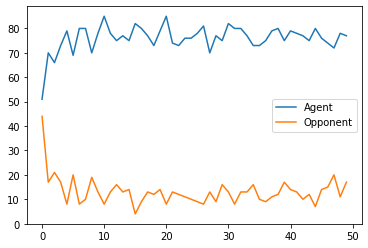

In [14]:
import matplotlib.pyplot as plt  ## Plotting number of matches won by agent and opponent during seeing efficacy while training
ax = np.arange(ef_test.shape[0])
plt.plot(ax,ef_test[:,0],label = 'Agent')
plt.plot(ax,ef_test[:,1],label = 'Opponent')
plt.legend()
plt.show()

In [13]:
###########
##TESTING##
###########

In [38]:
ntest = 1000
env.reset()
env.reset_tally()
s = 0
tl = np.zeros([ntest-1,2])

## Testing first half of total matches against random opponent

for i in range(0,int(ntest/2)):
    env.reset()
    print("Episode = ",i)
    s = 0
    a = greedy(Q,s)
    state, reward, is_over, tally = env.act(a)
    state_tr = transform(state)
    a_set = action_set(state_tr)

    while(is_over!=1):
        state, reward, is_over, tally = env.act(np.random.choice(a_set))
        state_tr = transform(state)
        a_set = action_set(state_tr)
        s = map_state(state_tr)
        
        if(len(a_set) == 0):
            break;
        
        a = greedy(Q,s,a_set)
        state, reward, is_over, tally = env.act(a)
        state_tr = transform(state)
        sn = map_state(state_tr)
        a_set = action_set(state_tr)
    temp = env.print_tally()
    print("Our agent won ",temp[0]," matches, opponent won ",temp[1]," matches.")
    tl[i,0] = temp[0]
    tl[i,1] = temp[1]
    print(" ")
    
tl2 = []

## Testing second half of total matches against safe opponent

for i in range(0,int(ntest/2)):
    env.reset()
    print("Episode = ",500+i)
    s = 0
    a = greedy(Q,s)
    state, reward, is_over, tally = env.act(a)
    state_tr = transform(state)
    a_set = action_set(state_tr)
    while(is_over!=1):
        a_choice = safe_choice(state,a_set)
        state, reward, is_over, tally = env.act(a_choice)
        state_tr = transform(state)
        a_set = action_set(state_tr)
        s = map_state(state_tr)
        
        if(len(a_set) == 0):
            break;
        
        a = greedy(Q,s,a_set)
        state, reward, is_over, tally = env.act(a)
        state_tr = transform(state)
        sn = map_state(state_tr)
        a_set = action_set(state_tr)
    temp = env.print_tally()
    print("Our agent won ",temp[0]," matches, opponent won ",temp[1]," matches.")
    tl[499+i,0] = temp[0]
    tl[499+i,1] = temp[1]
    print(" ")

Episode =  0
Player  1  wins the round
Our agent won  1  matches, opponent won  0  matches.
 
Episode =  1
Player  1  wins the round
Our agent won  2  matches, opponent won  0  matches.
 
Episode =  2
Player  1  wins the round
Our agent won  3  matches, opponent won  0  matches.
 
Episode =  3
Player  1  wins the round
Our agent won  4  matches, opponent won  0  matches.
 
Episode =  4
Player  2  wins the round
Game Over
Our agent won  4  matches, opponent won  1  matches.
 
Episode =  5
Player  1  wins the round
Our agent won  5  matches, opponent won  1  matches.
 
Episode =  6
Player  1  wins the round
Our agent won  6  matches, opponent won  1  matches.
 
Episode =  7
Player  1  wins the round
Our agent won  7  matches, opponent won  1  matches.
 
Episode =  8
Player  1  wins the round
Our agent won  8  matches, opponent won  1  matches.
 
Episode =  9
Player  1  wins the round
Our agent won  9  matches, opponent won  1  matches.
 
Episode =  10
Player  1  wins the round
Our agent 

Player  1  wins the round
Our agent won  145  matches, opponent won  10  matches.
 
Episode =  156
Player  1  wins the round
Our agent won  146  matches, opponent won  10  matches.
 
Episode =  157
Player  1  wins the round
Our agent won  147  matches, opponent won  10  matches.
 
Episode =  158
Player  1  wins the round
Our agent won  148  matches, opponent won  10  matches.
 
Episode =  159
Player  1  wins the round
Our agent won  149  matches, opponent won  10  matches.
 
Episode =  160
Player  1  wins the round
Our agent won  150  matches, opponent won  10  matches.
 
Episode =  161
Player  1  wins the round
Our agent won  151  matches, opponent won  10  matches.
 
Episode =  162
Player  1  wins the round
Our agent won  152  matches, opponent won  10  matches.
 
Episode =  163
Player  1  wins the round
Our agent won  153  matches, opponent won  10  matches.
 
Episode =  164
Player  1  wins the round
Our agent won  154  matches, opponent won  10  matches.
 
Episode =  165
Player  1 

Our agent won  308  matches, opponent won  21  matches.
 
Episode =  335
Our agent won  308  matches, opponent won  21  matches.
 
Episode =  336
Player  1  wins the round
Our agent won  309  matches, opponent won  21  matches.
 
Episode =  337
Our agent won  309  matches, opponent won  21  matches.
 
Episode =  338
Player  1  wins the round
Our agent won  310  matches, opponent won  21  matches.
 
Episode =  339
Player  1  wins the round
Our agent won  311  matches, opponent won  21  matches.
 
Episode =  340
Player  1  wins the round
Our agent won  312  matches, opponent won  21  matches.
 
Episode =  341
Player  1  wins the round
Our agent won  313  matches, opponent won  21  matches.
 
Episode =  342
Player  1  wins the round
Our agent won  314  matches, opponent won  21  matches.
 
Episode =  343
Player  1  wins the round
Our agent won  315  matches, opponent won  21  matches.
 
Episode =  344
Player  1  wins the round
Our agent won  316  matches, opponent won  21  matches.
 
Epis

Player  1  wins the round
Our agent won  416  matches, opponent won  35  matches.
 
Episode =  462
Player  1  wins the round
Our agent won  417  matches, opponent won  35  matches.
 
Episode =  463
Player  1  wins the round
Our agent won  418  matches, opponent won  35  matches.
 
Episode =  464
Player  1  wins the round
Our agent won  419  matches, opponent won  35  matches.
 
Episode =  465
Player  1  wins the round
Our agent won  420  matches, opponent won  35  matches.
 
Episode =  466
Player  1  wins the round
Our agent won  421  matches, opponent won  35  matches.
 
Episode =  467
Player  1  wins the round
Our agent won  422  matches, opponent won  35  matches.
 
Episode =  468
Player  1  wins the round
Our agent won  423  matches, opponent won  35  matches.
 
Episode =  469
Player  2  wins the round
Game Over
Our agent won  423  matches, opponent won  36  matches.
 
Episode =  470
Player  1  wins the round
Our agent won  424  matches, opponent won  36  matches.
 
Episode =  471


Player  2  wins the round
Game Over
Our agent won  477  matches, opponent won  89  matches.
 
Episode =  585
Player  2  wins the round
Game Over
Our agent won  477  matches, opponent won  90  matches.
 
Episode =  586
Player  1  wins the round
Our agent won  478  matches, opponent won  90  matches.
 
Episode =  587
Player  2  wins the round
Game Over
Our agent won  478  matches, opponent won  91  matches.
 
Episode =  588
Invalid Step, Try Again
Player  2  wins the round
Our agent won  478  matches, opponent won  92  matches.
 
Episode =  589
Player  2  wins the round
Game Over
Our agent won  478  matches, opponent won  93  matches.
 
Episode =  590
Player  1  wins the round
Our agent won  479  matches, opponent won  93  matches.
 
Episode =  591
Our agent won  479  matches, opponent won  93  matches.
 
Episode =  592
Player  1  wins the round
Our agent won  480  matches, opponent won  93  matches.
 
Episode =  593
Player  2  wins the round
Game Over
Our agent won  480  matches, oppone

Player  2  wins the round
Game Over
Our agent won  523  matches, opponent won  160  matches.
 
Episode =  710
Our agent won  523  matches, opponent won  160  matches.
 
Episode =  711
Player  1  wins the round
Our agent won  524  matches, opponent won  160  matches.
 
Episode =  712
Player  2  wins the round
Game Over
Our agent won  524  matches, opponent won  161  matches.
 
Episode =  713
Player  1  wins the round
Our agent won  525  matches, opponent won  161  matches.
 
Episode =  714
Player  2  wins the round
Game Over
Our agent won  525  matches, opponent won  162  matches.
 
Episode =  715
Our agent won  525  matches, opponent won  162  matches.
 
Episode =  716
Player  2  wins the round
Game Over
Our agent won  525  matches, opponent won  163  matches.
 
Episode =  717
Invalid Step, Try Again
Player  2  wins the round
Our agent won  525  matches, opponent won  164  matches.
 
Episode =  718
Player  1  wins the round
Our agent won  526  matches, opponent won  164  matches.
 
Epi

Game Over
Our agent won  570  matches, opponent won  213  matches.
 
Episode =  820
Player  1  wins the round
Our agent won  571  matches, opponent won  213  matches.
 
Episode =  821
Our agent won  571  matches, opponent won  213  matches.
 
Episode =  822
Player  1  wins the round
Our agent won  572  matches, opponent won  213  matches.
 
Episode =  823
Invalid Step, Try Again
Player  2  wins the round
Our agent won  572  matches, opponent won  214  matches.
 
Episode =  824
Player  2  wins the round
Game Over
Our agent won  572  matches, opponent won  215  matches.
 
Episode =  825
Player  1  wins the round
Our agent won  573  matches, opponent won  215  matches.
 
Episode =  826
Player  1  wins the round
Our agent won  574  matches, opponent won  215  matches.
 
Episode =  827
Player  2  wins the round
Game Over
Our agent won  574  matches, opponent won  216  matches.
 
Episode =  828
Our agent won  574  matches, opponent won  216  matches.
 
Episode =  829
Player  2  wins the roun

Player  1  wins the round
Our agent won  616  matches, opponent won  276  matches.
 
Episode =  943
Player  2  wins the round
Game Over
Our agent won  616  matches, opponent won  277  matches.
 
Episode =  944
Player  2  wins the round
Game Over
Our agent won  616  matches, opponent won  278  matches.
 
Episode =  945
Player  1  wins the round
Our agent won  617  matches, opponent won  278  matches.
 
Episode =  946
Player  2  wins the round
Game Over
Our agent won  617  matches, opponent won  279  matches.
 
Episode =  947
Our agent won  617  matches, opponent won  279  matches.
 
Episode =  948
Invalid Step, Try Again
Player  2  wins the round
Our agent won  617  matches, opponent won  280  matches.
 
Episode =  949
Player  1  wins the round
Our agent won  618  matches, opponent won  280  matches.
 
Episode =  950
Player  1  wins the round
Our agent won  619  matches, opponent won  280  matches.
 
Episode =  951
Player  2  wins the round
Game Over
Our agent won  619  matches, opponen

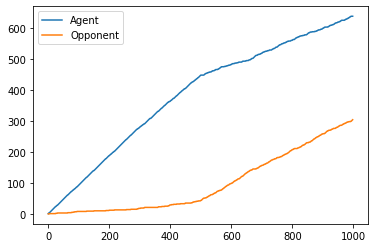

In [40]:
import matplotlib.pyplot as plt #### Plotting number of matches won by agent and opponent during testing
ax = np.arange(ntest-1)
plt.plot(ax,tl[:,0],label='Agent')
plt.plot(ax,tl[:,1],label='Opponent')
plt.legend()
plt.show()